In [2]:
import geopandas as gpd
import pandas as pd
import shapely
from shapely.geometry import Polygon,Point
from geopy.geocoders import GoogleV3
import rtree
import numpy as np
import matplotlib
import re
matplotlib.use("svg")
# AUTOLAB_IGNORE_START
%matplotlib inline
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [71]:
boros = gpd.GeoDataFrame.from_file('nybb_16d/nybb.shp').to_crs({'init': 'epsg:4326'})
zips = gpd.GeoDataFrame.from_file('ZIP_CODE_040114/ZIP_CODE_040114.shp').to_crs({'init': 'epsg:4326'})
non_decimal = re.compile(r'[^\s\d.-]+')
subways = pd.read_csv('DOITT_SUBWAY_ENTRANCE_01_13SEPT2010.csv')
subways['geometry'] = subways['the_geom'].apply(lambda z: Point(map(float,non_decimal.sub('', z).strip().split(' '))))
subways = gpd.GeoDataFrame(subways)
fhv = pd.read_csv('../fhv_tripdata_2016-01.csv')

In [3]:
fhv = pd.read_csv('../fhv_tripdata_2016-01.csv')

In [15]:
print fhv.head()
len(sorted(fhv['Dispatching_base_num'].value_counts(dropna=False).keys()))

  Dispatching_base_num          Pickup_date  locationID
0               B00001  2016-01-01 00:30:00         NaN
1               B00001  2016-01-01 00:30:00         NaN
2               B00001  2016-01-01 02:30:00         NaN
3               B00001  2016-01-01 07:00:00         NaN
4               B00001  2016-01-01 08:45:00         NaN


583

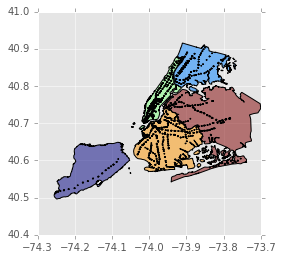

In [77]:
base = boros.plot()
# zips.plot(ax=base);
circles= subways.buffer(0.001)
mp = circles.unary_union
boros['geometry'].intersection(mp)
circles.plot(ax=base)
# subways.plot(ax=base, color='red',markersize=0.1);